### Task
1. Import pandas and matplotlib.pyplot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Task
1. Read 'iris.csv' and take a look. A good look.
2. Group data by its 'variety'. Give 'min', 'max', 'mean'.

In [7]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
iris.groupby('variety')['sepal.length','sepal.width','petal.length','petal.width'].agg([min,max,'mean'])

sepal.length             sepal.width             petal.length       \
                    min  max   mean         min  max   mean          min  max   
variety                                                                         
Setosa              4.3  5.8  5.006         2.3  4.4  3.428          1.0  1.9   
Versicolor          4.9  7.0  5.936         2.0  3.4  2.770          3.0  5.1   
Virginica           4.9  7.9  6.588         2.2  3.8  2.974          4.5  6.9   

                  petal.width              
             mean         min  max   mean  
variety                                    
Setosa      1.462         0.1  0.6  0.246  
Versicolor  4.260         1.0  1.8  1.326  
Virginica   5.552         1.4  2.5  2.026

### Task 
1. Import seaborn as sns
2. Pairplot the iris data.

In [9]:
import seaborn as sns

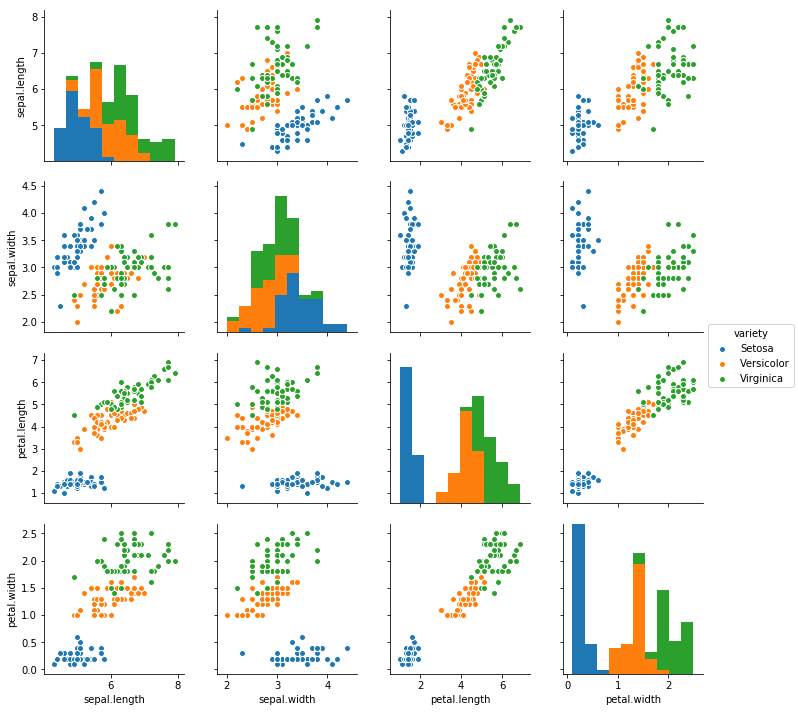

In [12]:
sns.pairplot(iris,hue = 'variety')

### Task
1. Import sklearn.preprocessing.StandardScaler http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
2. Let x be the feature values and y, the target values, 'variety' in this case.

3. Use StandardScaler to normalize the data.

In [22]:
from sklearn.preprocessing import StandardScaler

In [28]:
features = ['sepal.length','sepal.width','petal.length','petal.width']
x = iris.loc[:,features].values
y = iris.loc[:,'variety'].values

In [31]:
scaler = StandardScaler()
x= scaler.fit_transform(x)

### Task
1. Import sklearn.decomposition.PCA. http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
2. Set pca with n_component of 2 since we are reducing it from 4 to 2.
3. Normalize it.
4. Save it as a dataframe.

In [19]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2)
PC = pca.fit_transform(x)
df = pd.DataFrame(data = PC,columns=['pc_1','pc_2'])
df.head()

,pc_1,pc_2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


### Task
1. Combine the dataframe and df['variety'].

In [41]:
Df = pd.concat([df,iris['variety']], axis=1)
Df.head()

,pc_1,pc_2,variety
0,-2.264703,0.480027,Setosa
1,-2.080961,-0.674134,Setosa
2,-2.364229,-0.341908,Setosa
3,-2.299384,-0.597395,Setosa
4,-2.389842,0.646835,Setosa


### Task
1. Plot it.

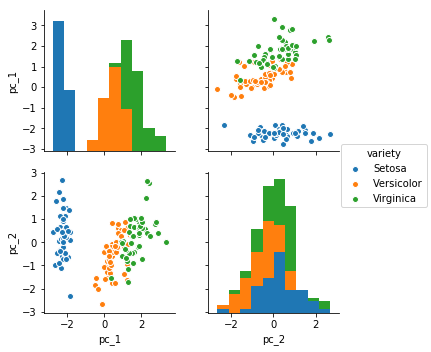

In [42]:
sns.pairplot(Df,hue = 'variety')

### Task
1. Find the explained variance ratio for each component. (Factor Analysis with pca.explained_variance_ratio_)

In [43]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

========================================================
### Task
1. PCA 'wine.csv'.
2. Find the explained variance ratio for each component.

In [86]:
wine = pd.read_csv('wine.csv',header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [97]:
wine.groupby([12]).agg([min,max,'mean'])

0                     1                    2                    3   \
    min   max      mean   min   max      mean  min   max      mean  min   
12                                                                        
0   3.8  14.2  6.854788  0.08  1.10  0.278241  0.0  1.66  0.334192  0.6   
1   4.6  15.9  8.319637  0.12  1.58  0.527821  0.0  1.00  0.270976  0.9   

      ...           8     9                    10                   11      \
      ...         mean   min   max      mean  min   max       mean min max   
12    ...                                                                    
0     ...     3.188267  0.22  1.08  0.489847  8.0  14.2  10.514267   3   9   
1     ...     3.311113  0.33  2.00  0.658149  8.4  14.9  10.422983   3   8   

              
        mean  
12            
0   5.877909  
1   5.636023  

[2 rows x 36 columns]

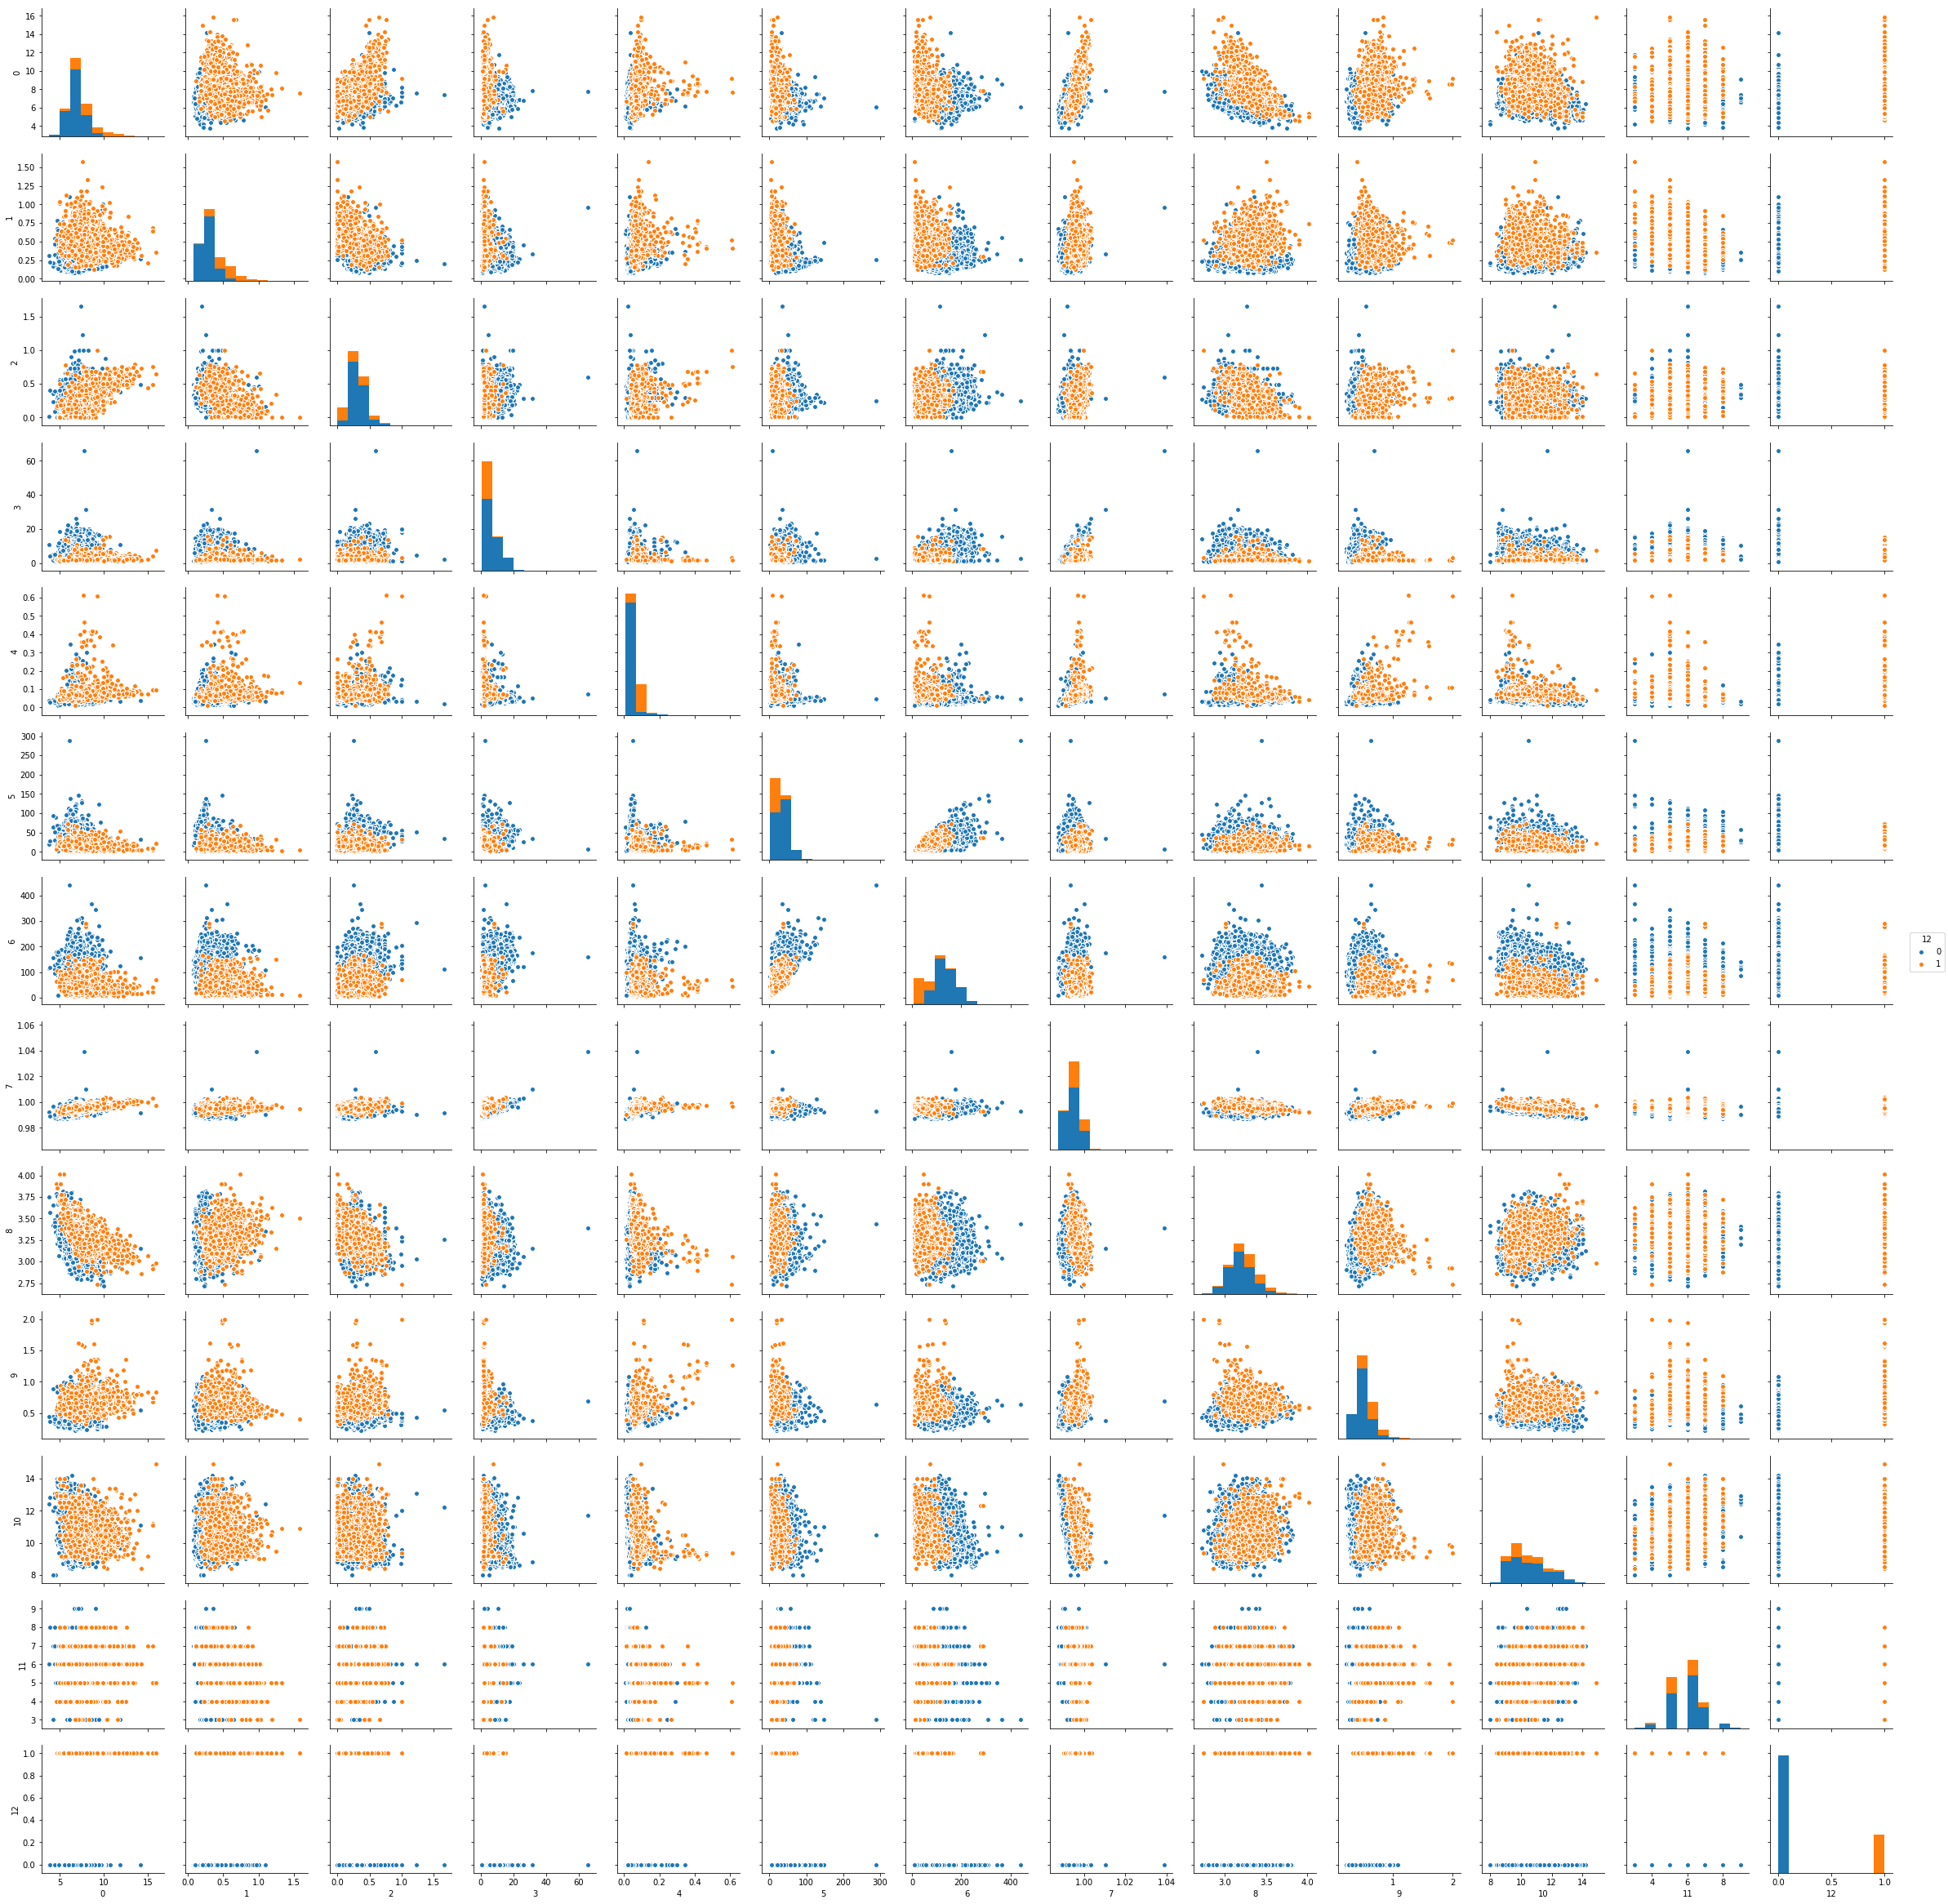

In [98]:
sns.pairplot(wine,hue = 12)

In [91]:
x = wine.loc[:,:11].values
y = wine.loc[:,11].values
z = wine.loc[:,12].values

In [92]:
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [93]:
pca = PCA(n_components=5)
PC = pca.fit_transform(x)
df = pd.DataFrame(data = PC)
df.head()

,0,1,2,3,4
0,-3.348438,0.568926,-2.727386,-0.223777,0.621408
1,-3.228595,1.197335,-1.998904,-0.377154,0.110313
2,-3.237468,0.952580,-1.746578,-0.472791,0.225404
3,-1.672561,1.600583,2.856552,-0.438364,0.213093
4,-3.348438,0.568926,-2.727386,-0.223777,0.621408


In [94]:
pca.explained_variance_ratio_

array([0.25346226, 0.22082117, 0.13679223, 0.0890521 , 0.07004171])

In [95]:
wine_pca = pd.concat([df,wine[12]], axis=1)
wine_pca.head()

,0,1,2,3,4,12
0,-3.348438,0.568926,-2.727386,-0.223777,0.621408,1
1,-3.228595,1.197335,-1.998904,-0.377154,0.110313,1
2,-3.237468,0.952580,-1.746578,-0.472791,0.225404,1
3,-1.672561,1.600583,2.856552,-0.438364,0.213093,1
4,-3.348438,0.568926,-2.727386,-0.223777,0.621408,1


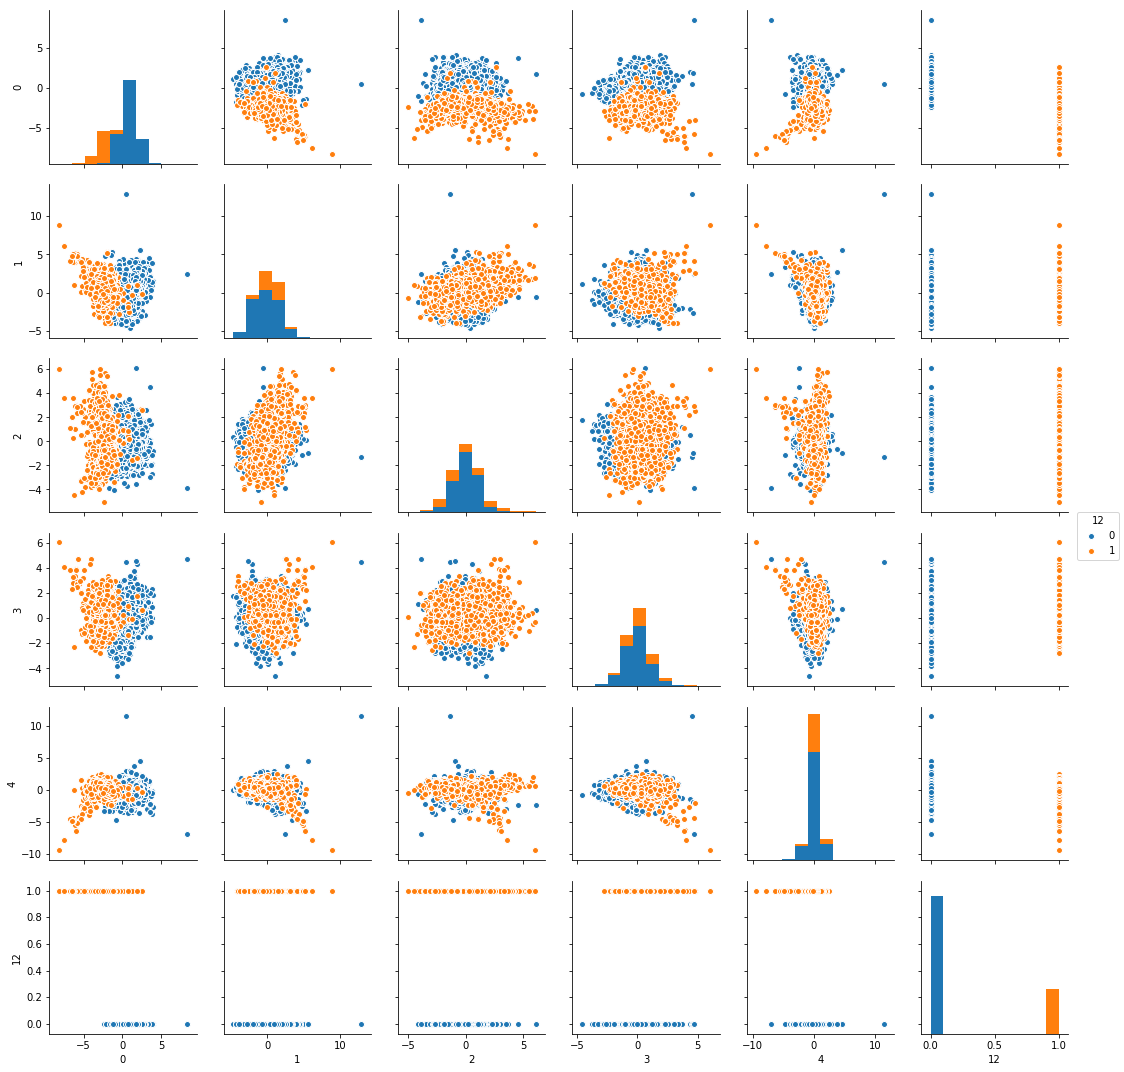

In [96]:
sns.pairplot(wine_pca,hue = 12)